# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 7804 files belonging to 17 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy']


# Loading Model

In [4]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

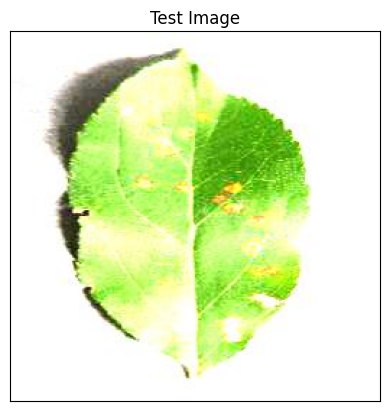

In [5]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [9]:
# image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
# input_arr = tf.keras.preprocessing.image.img_to_array(image)
# input_arr = np.array([input_arr])  # Convert single image to a batch.
# predictions = cnn.predict(input_arr)

image = tf.keras.preprocessing.image.load_img(
    image_path,
    target_size=(224, 224)   # MUST match training size
)

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0        # normalize
input_arr = np.expand_dims(input_arr, axis=0)

predictions = cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [10]:
print(predictions)

[[1.6963530e-07 2.8787137e-28 1.7986581e-13 1.8730336e-23 1.7789538e-14
  9.9999988e-01 6.6910397e-09 1.5719711e-25 8.4712154e-28 3.1741215e-27
  1.2853807e-26 4.6748373e-11 1.0482032e-22 1.5908458e-19 4.7951617e-31
  5.5845605e-21 2.1609776e-12]]


In [11]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

5


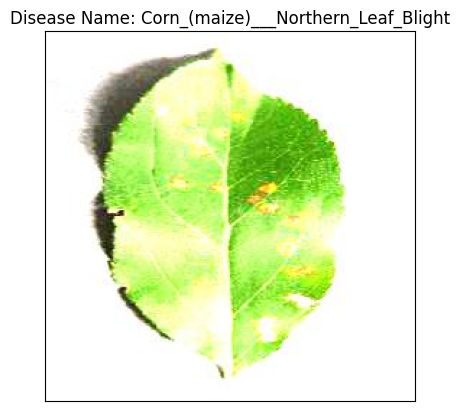

In [12]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()